<a href="https://colab.research.google.com/github/Shivay-Shakti/ABP-News-Recommendation-Engine/blob/main/Implementation_News_Recommender_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Client - Client.csv to Client - Client.csv
Saving Story - Story.csv to Story - Story.csv


In [ ]:
story=pd.read_csv("Story - Story.csv")
client=pd.read_csv("Client - Client.csv")

In [ ]:
client=client.drop_duplicates()

In [ ]:
client

,Client Id,City,Category,Article ID,Page Name,Time on Page,Article Word Count
0,153644767.2,Jaipur,india,2049695,India bought Pegasus spyware from Israel in 20...,26:10:51,"88,985"
1,1750871419,Surat,india,745681,UP Elections: Congress to contest election on ...,14:13:47,"36,108"
2,1153612101,Guwahati,up-uk,2047989,Uttarakhand Congress former president Kishor U...,13:42:46,"38,192"
3,amp-FYUy07TUxmHSgIcFddK7ow,Lucknow,up-uk,2054081,Barabanki Dariyabad former MLA minister Rajeev...,9:41:57,"60,931"
4,1865139517,Surat,ahmedabad,752223,Teenage Corona Vaccination : 15 to 18 year tee...,8:47:29,"41,280"
...,...,...,...,...,...,...,...
4994,575689844.2,Ahmedabad,india,2054764,Goa Election 2022: Who will be the biggest par...,0:26:14,924
4995,819090891.2,Mumbai,bihar,2053577,Bihar: Liquor worth lakhs being brought from A...,0:26:14,305
4996,95857448.16,Kolkata,aaj-focus-e,863166,ABP C Voter Survey: Will Amit Shahs Visits Ben...,0:26:14,0
4997,amp-sfM3xowbPn8H8fnPXTLDQQ,Bhiwandi,india,2054488,Akhilesh Yadav on attack on AIMIM Chief Asadud...,0:26:14,300


In [ ]:
story

,Article ID,Page Name,Category,Article Tags,Time on Page,Pageviews
0,2055636,Lata Mangeshkar Wanted To Marry With Famous Si...,bollywood,Lata Mangeshkar,6491:26:13,"536,008"
1,2054988,up bjp deputy chief minister dinesh sharma ann...,up-uk,Dinesh sharma | Dayashankar Singh | up electio...,3120:04:58,"218,240"
2,1030306,Airtel Google deal will give wings to Digital ...,india,Google | Digital India | Bharti Airtel | Airte...,3009:27:42,"157,935"
3,2057902,4 zodiac signs will get tremendous benefits du...,religion,Shani dev,2859:19:28,"238,634"
4,2056998,mahashivratri 2022 when is falgun month mahash...,religion,Mahashivratri 2022 | maha shivratri 2022 | shi...,2545:57:04,"210,309"
...,...,...,...,...,...,...
4995,2055595,Delhi Nagar Nigam Budget 2022: Delhi Municipal...,delhi-ncr,Delhi | Delhi Nagar Nigam | Delhi Nagar Nigam ...,2:50:42,221
4996,2049658,UP Assembly Election 2022 AGRA was strong hold...,up-uk,UP news | UP assembly election 2022 | up elect...,2:50:36,181
4997,2059514,Quad Meet China Beijing India USA Japan | Quad...,world,Australia | India | China | America | Japan | ...,2:50:21,137
4998,643360,"Sunil Jakhar, who spoke in the midst of the Co...",punjab,sunil jakhar | Punjab Congress | Punjab Electi...,2:50:13,313


In [ ]:
story["time_ratings"]=story["Time on Page"].replace(":","",regex=True)

In [ ]:
story = story[story['time_ratings'].apply(lambda x: str(x).isdigit())]
story['time_ratings']=pd.to_numeric(story['time_ratings'], downcast='integer', errors='coerce')

In [ ]:
story

,Article ID,Page Name,Category,Article Tags,Time on Page,Pageviews,time_ratings
0,2055636,Lata Mangeshkar Wanted To Marry With Famous Si...,bollywood,Lata Mangeshkar,6491:26:13,"536,008",64912613
1,2054988,up bjp deputy chief minister dinesh sharma ann...,up-uk,Dinesh sharma | Dayashankar Singh | up electio...,3120:04:58,"218,240",31200458
2,1030306,Airtel Google deal will give wings to Digital ...,india,Google | Digital India | Bharti Airtel | Airte...,3009:27:42,"157,935",30092742
3,2057902,4 zodiac signs will get tremendous benefits du...,religion,Shani dev,2859:19:28,"238,634",28591928
4,2056998,mahashivratri 2022 when is falgun month mahash...,religion,Mahashivratri 2022 | maha shivratri 2022 | shi...,2545:57:04,"210,309",25455704
...,...,...,...,...,...,...,...
4995,2055595,Delhi Nagar Nigam Budget 2022: Delhi Municipal...,delhi-ncr,Delhi | Delhi Nagar Nigam | Delhi Nagar Nigam ...,2:50:42,221,25042
4996,2049658,UP Assembly Election 2022 AGRA was strong hold...,up-uk,UP news | UP assembly election 2022 | up elect...,2:50:36,181,25036
4997,2059514,Quad Meet China Beijing India USA Japan | Quad...,world,Australia | India | China | America | Japan | ...,2:50:21,137,25021
4998,643360,"Sunil Jakhar, who spoke in the midst of the Co...",punjab,sunil jakhar | Punjab Congress | Punjab Electi...,2:50:13,313,25013


In [ ]:
story["time_ratings"].quantile(0.25)

44642.0

In [ ]:
story["time_ratings"].quantile(0.5)

101404.5

In [ ]:
story["time_ratings"].quantile(0.75)
story["time_ratings"].quantile(0.9)

923862.7000000002

In [ ]:
for col in story.columns:
    for row in story.index:
        if story.loc[row,"time_ratings"]>=923862:
            story.loc[row,"Ratings"]=5
        if story.loc[row,"time_ratings"]>=101404:
            if story.loc[row,"time_ratings"]<923862:
                story.loc[row,"Ratings"]=4
        if story.loc[row,"time_ratings"]>=1640:
            if story.loc[row,"time_ratings"]<101404:
                story.loc[row,"Ratings"]=3
        if story.loc[row,"time_ratings"]>=409:
            if story.loc[row,"time_ratings"]<1640:
                story.loc[row,"Ratings"]=2
        else:
            story.loc[row,"Ratings"]=1

In [ ]:
story

,Article ID,Page Name,Category,Article Tags,Time on Page,Pageviews,time_ratings,Ratings
0,1518570,Exclusive Sushant Singh Rajput and Disha Salia...,india,Disha Salian | Sushant Singh Rajput | WhatsApp,15121:15:40,"5,48,845",151211540,5.0
1,1515525,Yeh Rishtey Hain Pyaar Ke actor Sameer Sharma ...,television,Mumbai | Sameer Sharma | suicide | Yeh Rishtey...,11201:26:38,"6,95,533",112012638,5.0
2,1518991,Rhea Chakraborty shared WhatsApp messages with...,bollywood,Priyanka Singh | Rhea Chakraborty | Sushant Si...,6831:09:42,"3,74,309",68310942,5.0
3,1512575,Sushant Singh Rajput flatmate Siddharth Pitha...,bollywood,bihar police | mumbai police | OP Singh | Sidd...,2795:41:36,"1,56,838",27954136,5.0
4,1516372,Madras High Court imposes 10 lakh fine on Pata...,india,coronil | Madras High Court | Patanjali,1740:22:55,"1,04,753",17402255,5.0
5,795900,Sushant girlfriend Rhea Chakraborty is traveli...,bollywood,aditya thackearay | aditya thakare | ankita | ...,1726:21:10,"1,38,061",17262110,5.0
6,1511329,Vivo IPL 2020 Schedule UAE: IPL 2020 Dates Rel...,ipl,INDIAN PREMIER LEAGUE | IPL 2020 | IPL Schedule,1419:03:15,"1,07,756",14190315,5.0
7,723216,Change of complete lockdown dates in west Ben...,states,Change of dates | Complete Lockdown | West Bengal,1389:16:07,"1,35,184",13891607,5.0
8,1517188,Model turned IAS Aishwarya Sheoran said: Mater...,india,aishwarya sheoran | IAS | material collector |...,1332:18:10,"69,792",13321810,5.0
9,1516034,Sushant Singh Rajput death case: CBI registers...,india,CBI | FIR | Rhea Chakraborty | Sushant Singh R...,1282:22:24,"1,13,347",12822224,5.0


In [ ]:
c=story["Ratings"].mean()
print(c)

2.4542


In [ ]:
story =story[story['Pageviews'].apply(lambda x: str(x).isdigit())]
story['Pageviews']=pd.to_numeric(story['Pageviews'], downcast='integer', errors='coerce')
m=story["Pageviews"].quantile(.9)

C:\Users\Anantha Krishnan\anaconda32\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
print(m)

250.0


In [ ]:
def weighted_rating(x, m=m, c=c):
    v = x['Pageviews']
    R = x['Ratings']
    # Calculation based on the IMDB formula
    return (v/(v+m) * R) + (m/(m+v) * c)

story['score'] = story.apply(weighted_rating, axis=1)

C:\Users\Anantha Krishnan\anaconda32\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
story.sort_values('score',ascending=False)

,Article ID,Page Name,Category,Article Tags,Time on Page,Pageviews,time_ratings,Ratings,score
1126,1513527,How Ram Mandir Movement Started; Know the Face...,india,Ashok Singhal | Ayodhya Ram Mandir Bhumi Pujan...,36:21:36,890,362136,5.0,4.441711
1290,1511660,21 years after High Court verdict Supreme Cour...,india,ayodhya | babri masjid | Ram mandir special se...,29:27:24,762,292724,5.0,4.371097
859,1245932,Star Bharat Show RadhaKrishn To Start Shooting...,television,Coronavirus Pandemic | COVID-19 | Lockdown | M...,50:21:09,458,502109,5.0,4.101059
1556,1517092,Rahul Gandhi Says RBI reveals the real Mood of...,india,PM Modi | Rahul Gandhi | RBI,21:26:13,956,212613,4.0,3.679561
1546,794871,Shivsena leader minister subhash desai on Raj ...,maharashtra,cm uddhav thackeray interview | Maha Vikas Agh...,21:49:21,922,214921,4.0,3.670265
1503,562238,"Spurious liquor kills 90 in Punjab, 25 arreste...",punjab,Punjab News | punjab police | spurious Liquor,23:00:28,867,230028,4.0,3.654029
2358,541628,People entry ban at Dumas beach of Surat due t...,surat,coronavirus | Coronavirus Effect | Dumas beach...,08:47:53,998,84753,3.0,2.890665
1794,1511313,Ram Mandir Live Updates: Bhumi Pujan in Ayodhy...,india,Ayodhya | Rama | Ram Janambhoomi | Narendra Mo...,16:42:48,996,164248,3.0,2.890490
2395,540860,Know when will Gujarat BJP chief CR Patil to a...,gujarat,CR Patel | Gujarat Bjp | Gujarat BJP Chief | N...,08:25:44,995,82544,3.0,2.890402
2042,796705,Corona Vaccine Update zydus cadila starts phas...,india,corona vaccine | Zycov-D Phase-2 Trial | Zydus...,12:30:48,994,123048,3.0,2.890314


In [ ]:

def pop_rec():
    storya=story.sort_values('score',ascending=False).head(5)
    storya=pd.DataFrame(storya["Page Name"])
    return storya

pop_rec()

,Page Name
1,How Ram Mandir Movement Started; Know the Face...
2,21 years after High Court verdict Supreme Cour...
0,Star Bharat Show RadhaKrishn To Start Shooting...
5,Rahul Gandhi Says RBI reveals the real Mood of...
4,Shivsena leader minister subhash desai on Raj ...


In [ ]:
from geotext import GeoText


story["Article Tags"]=story["Article Tags"].str.replace("|","")
story

C:\Users\Anantha Krishnan\anaconda32\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Article ID,Page Name,Category,Article Tags,Time on Page,Pageviews,time_ratings,Ratings,score
859,1245932,Star Bharat Show RadhaKrishn To Start Shooting...,television,Coronavirus Pandemic COVID-19 Lockdown Mall...,50:21:09,458,502109,5.0,4.101059
1126,1513527,How Ram Mandir Movement Started; Know the Face...,india,Ashok Singhal Ayodhya Ram Mandir Bhumi Pujan ...,36:21:36,890,362136,5.0,4.441711
1290,1511660,21 years after High Court verdict Supreme Cour...,india,ayodhya babri masjid Ram mandir special seri...,29:27:24,762,292724,5.0,4.371097
1503,562238,"Spurious liquor kills 90 in Punjab, 25 arreste...",punjab,Punjab News punjab police spurious Liquor,23:00:28,867,230028,4.0,3.654029
1546,794871,Shivsena leader minister subhash desai on Raj ...,maharashtra,cm uddhav thackeray interview Maha Vikas Agha...,21:49:21,922,214921,4.0,3.670265
1556,1517092,Rahul Gandhi Says RBI reveals the real Mood of...,india,PM Modi Rahul Gandhi RBI,21:26:13,956,212613,4.0,3.679561
1562,1506724,Police will now question to former girlfriend ...,india,Ankita Lokhande bihar police india Rhea Cha...,21:16:44,805,211644,3.0,2.870664
1567,795121,coronavirus covid-19 lockdown unlock maharahst...,maharashtra,breaking news rain update ram mandir mumbai...,21:06:59,812,210659,3.0,2.871516
1597,541138,Heavy Rainfall in Rajkot Jetpur at last day | ...,rajkot,Cyclone Havaman vibhag Heavy rain heavy rai...,20:19:12,843,201912,3.0,2.875160
1617,796099,UPSC Civil Services Examination 2019 result de...,maharashtra,Education News Education News Latest News ne...,19:56:32,823,195632,3.0,2.872833


In [ ]:
def create_soup(x):
    return ' '+ x['Page Name']+' '+ x['Category']+ ' '+x['Article Tags']

story['soup']=story.apply(create_soup, axis=1)
    

C:\Users\Anantha Krishnan\anaconda32\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
story.reset_index(inplace=True)
story

,index,Article ID,Page Name,Category,Article Tags,Time on Page,Pageviews,time_ratings,Ratings,score,soup
0,859,1245932,Star Bharat Show RadhaKrishn To Start Shooting...,television,Coronavirus Pandemic COVID-19 Lockdown Mall...,50:21:09,458,502109,5.0,4.101059,Star Bharat Show RadhaKrishn To Start Shootin...
1,1126,1513527,How Ram Mandir Movement Started; Know the Face...,india,Ashok Singhal Ayodhya Ram Mandir Bhumi Pujan ...,36:21:36,890,362136,5.0,4.441711,How Ram Mandir Movement Started; Know the Fac...
2,1290,1511660,21 years after High Court verdict Supreme Cour...,india,ayodhya babri masjid Ram mandir special seri...,29:27:24,762,292724,5.0,4.371097,21 years after High Court verdict Supreme Cou...
3,1503,562238,"Spurious liquor kills 90 in Punjab, 25 arreste...",punjab,Punjab News punjab police spurious Liquor,23:00:28,867,230028,4.0,3.654029,"Spurious liquor kills 90 in Punjab, 25 arrest..."
4,1546,794871,Shivsena leader minister subhash desai on Raj ...,maharashtra,cm uddhav thackeray interview Maha Vikas Agha...,21:49:21,922,214921,4.0,3.670265,Shivsena leader minister subhash desai on Raj...
5,1556,1517092,Rahul Gandhi Says RBI reveals the real Mood of...,india,PM Modi Rahul Gandhi RBI,21:26:13,956,212613,4.0,3.679561,Rahul Gandhi Says RBI reveals the real Mood o...
6,1562,1506724,Police will now question to former girlfriend ...,india,Ankita Lokhande bihar police india Rhea Cha...,21:16:44,805,211644,3.0,2.870664,Police will now question to former girlfriend...
7,1567,795121,coronavirus covid-19 lockdown unlock maharahst...,maharashtra,breaking news rain update ram mandir mumbai...,21:06:59,812,210659,3.0,2.871516,coronavirus covid-19 lockdown unlock maharahs...
8,1597,541138,Heavy Rainfall in Rajkot Jetpur at last day | ...,rajkot,Cyclone Havaman vibhag Heavy rain heavy rai...,20:19:12,843,201912,3.0,2.875160,Heavy Rainfall in Rajkot Jetpur at last day |...
9,1617,796099,UPSC Civil Services Examination 2019 result de...,maharashtra,Education News Education News Latest News ne...,19:56:32,823,195632,3.0,2.872833,UPSC Civil Services Examination 2019 result d...


In [ ]:
var=[]
for i in range(0,len(story.soup)):
    places = GeoText(story['soup'][i])
    print(places.cities)
    var.append(places.cities)

['Mumbai']
[]
[]
[]
[]
[]
['Police']
[]
['Ahmedabad']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['Chennai', 'Beirut']
[]
['Ayodhya', 'Corona']
[]
[]
['Ayodhya', 'Rama']
['Ayodhya', 'Ayodhya', 'Ayodhya']
[]
[]
[]
['Noida']
['Ayodhya', 'Rama']
[]
[]
[]
[]
[]
['Mumbai']
[]
[]
[]
[]
[]
['Govardhan']
['Ahmedabad']
[]
[]
[]
[]
[]
[]
[]
[]
[]
['Temple', 'Ayodhya', 'Date']
['Ayodhya', 'Rama']
[]
[]
[]
[]
['Ayodhya', 'Rama']
[]
['Mumbai']
['Mumbai']
[]
[]
['Mumbai']
[]
[]
[]
[]
['Mumbai']
[]
['Police']
['Corona']
['Ayodhya']
[]
[]
[]
[]
['Ayodhya']
[]
['Pune']
[]
[]
['Chandigarh', 'Mumbai']
[]
[]
[]
[]
[]
[]
[]
['Ayodhya']
[]
[]
[]
[]
[]
[]
[]
['Beirut', 'Beirut']
[]
[]
[]
[]
['Ayodhya']
[]
['Kozhikode']
[]
['Lucknow']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['Mumbai']
[]
[]
[]
[]
['Pimpri']
[]
[]
['Ayodhya', 'Rama']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['Ayodhya']
['Temple', 'Ayodhya', 'Date']
[]
[]
[]
['Ayodhya']
[]
[]
['Mission', 'Mission']
['Srinagar']
[]
[]
[]
[]
[]
[]
[]
['Ayodhya']
[]
[

[]
[]
[]
[]
['Ayodhya']
[]
[]
[]
['Ayodhya']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['Fleet']
[]
[]
[]
[]
[]
[]
['Ayodhya', 'Ayodhya']
[]
[]
[]
[]
[]
[]
['Ayodhya']
[]
[]
[]
[]
[]
['Corona']
[]
[]
[]
[]
[]
[]
['Puri']
[]
['Ayodhya']
[]
[]
['Corona']
[]
[]
['Mumbai']
[]
['Bhiwandi']
['Mumbai']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['London']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['Delhi']
[]
[]
[]
['Darbhanga']
[]
[]
['Ayodhya', 'Ayodhya']
[]
[]
[]
['Ujjain']
[]
[]
['Ayodhya']
[]
[]
[]
['Delhi', 'Delhi']
['Police']
['Mumbai']
[]
[]
['Delhi']
[]
['Ahmedabad', 'Ayodhya', 'Ayodhya', 'Ayodhya', 'Ayodhya']
['Ayodhya']
[]
[]
[]
['Ayodhya']
[]
['Oxford']
[]
['Ujjain']
[]
['Ayodhya', 'Ayodhya']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['Delhi']
['Nagpur']
['Delhi']
[]
[]
[]
[]
['Corona']
[]
[]
[]
[]
['Mumbai']
[]
['Ahmedabad']
[]
[]
[]
[]
[]
['Noida', 'Delhi']
[]
['Ahmedabad']
[]
['Corona']
[]
[]
[]
[]
['Corona']
['Along']
[]
['Latur']
['Corona']
[]
['Srinagar']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['Mob

['Bareilly']
[]
[]
[]
['Delhi', 'Corona']
[]
[]
['Pune', 'London', 'Pune']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['Patna']
[]
['Delhi']
[]
[]
[]
[]
[]
[]
[]
[]
['Ahmedabad', 'Vadodara', 'Vadodara']
['Pune', 'Pune']
[]
['Ayodhya']
[]
[]
['Of']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['Dehradun']
[]
[]
[]
[]
[]
['Jammu']
['Police']
['Deoria', 'Deoria']
[]
['Deal']
[]
[]
[]
[]
[]
['Ayodhya']
[]
['Union']
['Mumbai', 'Mumbai']
[]
['Corona']
[]
[]
['Corona']
[]
[]
['Police']
[]
[]
['Pauri']
[]
['Delhi', 'Delhi']
[]
[]
[]
[]
['Ayodhya']
['Patna']
[]
[]
[]
[]
[]
['Corona']
[]
[]
[]
['Delhi']
[]
['Gorakhpur']
[]
[]
[]
[]
['Corona', 'Corona', 'Mumbai']
[]
[]
[]
[]
[]
['Ayodhya']
[]
[]
['Delhi']
[]
[]
[]
['Ayodhya', 'Ayodhya']
['Corona', 'Corona', 'Corona']
[]
[]
[]
[]
['Mysore']
[]
[]
[]
[]
[]
['Corona']
[]
[]
[]
['Navi Mumbai']
[]
['Bela', 'Pearl', 'Puri']
['Ayodhya']
[]
[]
[]
[]
[]
[]
[]
['Navi Mumbai', 'Navi Mumbai']
['Ahmedabad', 'Ahmedabad', 'Ahmedabad']
['Oxford']
[]
[]
[]
['Pune', 'Pune']
[]

[]
[]
[]
[]
[]
['Corona']
[]
[]
[]
[]
[]
[]
[]
[]
['Union']
[]
[]
[]
[]
[]
['Corona']
[]
[]
['Bay']
[]
['Best']
[]
[]
[]
[]
[]
['Ayodhya']
[]
['Ayodhya', 'Ayodhya']
[]
[]
[]
[]
[]
[]
[]
[]
['Sale']
['Corona']
[]
[]
[]
[]
['Mumbai']
[]
[]
[]
['Police']
[]
[]
[]
[]
[]
[]
[]
[]
['Noida']
[]
['Sunrise', 'Sunrise']
[]
[]
[]
[]
['Kharagpur', 'Kharagpur']
[]
['Corona']
[]
[]
[]
['Varanasi']
[]
[]
[]
['Corona']
[]
[]
[]
[]
[]
[]
[]
['Ayodhya', 'Ujjain']
[]
[]
[]
[]
[]
[]
[]
[]
[]
['Police']
[]
[]
[]
[]
[]
[]
['Ayodhya']
[]
[]
[]
[]
[]
[]
[]
[]
['Noida']
[]
['Jammu']
[]
[]
[]
['Federal']
['Delhi']
[]
[]
[]
[]
[]
[]
[]
['Delhi', 'Delhi']
[]
[]
[]
[]
[]
['Of']
[]
[]
[]
['Corona']
[]
['Mumbai', 'Corona', 'Corona']
[]
[]
[]
[]
[]
[]
[]
[]
['Nagpur']
[]
[]
[]
[]
[]
[]
[]
['Mumbai', 'Mumbai']
[]
[]
[]
[]
[]
[]
['Delhi', 'Delhi']
['Johnson']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['Delhi']
['Delhi', 'Delhi']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['Police']
[]
[]
['Corona']
[]
[]
[]
[]
[]
[]
['Mumbai', '

['Visakhapatnam']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['Of']
['Ujjain']
[]
[]
[]
[]
[]
['Pearl', 'Puri', 'Pearl', 'Puri']
[]
[]
[]
[]
['Tirupati']
[]
[]
[]
[]
[]
[]
['Ahmedabad', 'Ahmedabad']
[]
[]
[]
[]
[]
['Wedding']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['Delhi', 'Delhi']
[]
[]
[]
['Visakhapatnam']
[]
[]
[]
['Corona']
['Pandharpur', 'Corona']
[]
[]
[]
['Delhi']
[]
['Corona']
[]
[]
[]
[]
[]
[]
[]
['Kashi', 'Mathura', 'Kashi']
[]
['Police']
[]
[]
['Pune', 'Pune', 'Pune']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['Goa']
['Manali']
[]
[]
[]
[]
[]
[]
['Corona']
[]
['Mumbai']
[]
['Delhi']
[]
['Corona', 'Bareilly']
[]
['Madhubani']
[]
['Chandrapur']
[]
[]
[]
[]
[]
[]
['Of']
['Delhi', 'Delhi', 'Delhi', 'Delhi']
[]
[]
[]
[]
[]
[]
[]
['Osmanabad', 'Osmanabad', 'Osmanabad']
[]
[]
[]
[]
['Mumbai']
[]
[]
[]
[]
[]
[]
[]
[]
[]
['Nokia', 'Nokia', 'Nokia', 'Nokia', 'Nokia', 'Nokia']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['Mumbai']
['Mumbai']
[]
[]
[]
[]
[]
['Corona']
[]
[]
[]
['Gorakhpur']
[]
['P

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['Police']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['Delhi', 'Police']
[]
['Mumbai']
[]
['Delhi']
[]
[]
['Dehradun']
[]
[]
[]
['Police']
[]
[]
[]
[]
[]
[]
['Mumbai']
[]
[]
[]
['Lucknow']
[]
[]
[]
['Ayodhya']
[]
[]
['Date']
['Aurangabad', 'Aurangabad', 'Aurangabad', 'Aurangabad']
['Navi Mumbai']
[]
['Nagpur', 'Nagpur', 'Nagpur']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['Hollywood']
[]
[]
[]
[]
['Delhi']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['Ahmedabad']
[]
[]
[]
[]
['Puri', 'Pearl', 'Puri']
['Of']
[]
['Mumbai']
[]
[]
[]
[]
[]
[]
['Lucknow']
['Police']
[]
[]
[]
[]
['Vadodara', 'Vadodara']
[]
[]
[]
['Corona']
['Nagar']
[]
['Ayodhya']
[]
[]
[]
['March']
[]
['Mumbai', 'Mumbai']
[]
[]
[]
[]
['Corona', 'Corona']
[]
['Corona']
[]
[]
['Mumbai']
[]
[]
[]
[]
[]
[]
[]
[]
['Delhi', 'Delhi', 'Delhi', 'Delhi', 'Delhi', 'University']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['Pulwama', 'Pulwama']
['Lucknow']
['Varanasi', 'Varanasi', 'Varanasi']
[]

[]
[]
[]
['Police']
[]
['Gorakhpur']
[]
['Dehradun']
[]
[]
['Corona']
[]
[]
[]
[]
[]
['Corona']
[]
[]
[]
[]
[]
[]
[]
['Corona']
['Islamabad']
['Corona']
[]
[]
['Haridwar']
['Mumbai']
[]
['Stuart']
[]
[]
[]
['Tonk']
[]
[]
['Mumbai']
['Nashik', 'Corona']
[]
['Pune']
[]
[]
[]
['Delhi', 'Delhi']
[]
[]
['Gorakhpur']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['Corona', 'Mumbai']
[]
[]
[]
['Temple']
[]
[]
['Hingoli']
[]
['Kozhikode']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['Corona']
[]
[]
[]
[]
[]
[]
['Delhi']
[]
[]
[]
[]
[]
[]
['Mumbai', 'Mumbai', 'Mumbai']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['Lucknow']
[]
['Bulandshahr']
['Corona']
['Amroha']
[]
[]
['Corona']
[]
[]
[]
['Corona']
['Pearl', 'Puri']
[]
[]
['Muzaffarnagar']
[]
[]
[]
['Delhi', 'Delhi', 'Delhi']
['Bareilly', 'Police']
[]
[]
[]
[]
[]
[]
[]
[]
['Young']
[]
['Juma', 'Juma']
[]
['Ahmedabad']
[]
[]
[]
[]
['Delhi']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['Police']
[]
[]
[]
[]
['Delhi', 'Delhi']
[]
[]
['Ayodhya']
['Kozhikode']
[]
[]
[]
['Mumbai', 

In [ ]:
story2=story.copy()

In [ ]:
new=pd.DataFrame(var)
new.columns=['a','b','c','d','e','f','g']


In [ ]:
new["city"]= new["a"].map(str)+" "+new["b"].map(str)+" "+new["c"].map(str)+" "+new["d"].map(str)+" "+new["e"].map(str)+" "+new["f"].map(str)+" "+new["g"].map(str)

In [ ]:
new

,a,b,c,d,e,f,g,city
0,Mumbai,None,None,None,None,None,None,Mumbai None None None None None None
1,None,None,None,None,None,None,None,None None None None None None None
2,None,None,None,None,None,None,None,None None None None None None None
3,None,None,None,None,None,None,None,None None None None None None None
4,None,None,None,None,None,None,None,None None None None None None None
5,None,None,None,None,None,None,None,None None None None None None None
6,Police,None,None,None,None,None,None,Police None None None None None None
7,None,None,None,None,None,None,None,None None None None None None None
8,Ahmedabad,None,None,None,None,None,None,Ahmedabad None None None None None None
9,None,None,None,None,None,None,None,None None None None None None None


In [ ]:
new["city"]=new["city"].str.replace("None","")

In [ ]:
new["city"].unique()

array(['Mumbai      ', '      ', 'Police      ', 'Ahmedabad      ',
       'Chennai Beirut     ', 'Ayodhya Corona     ', 'Ayodhya Rama     ',
       'Ayodhya Ayodhya Ayodhya    ', 'Noida      ', 'Govardhan      ',
       'Temple Ayodhya Date    ', 'Corona      ', 'Ayodhya      ',
       'Pune      ', 'Chandigarh Mumbai     ', 'Beirut Beirut     ',
       'Kozhikode      ', 'Lucknow      ', 'Pimpri      ',
       'Mission Mission     ', 'Srinagar      ', 'Beirut      ',
       'Billings      ', 'Ujjain      ',
       'Ayodhya Ayodhya Ayodhya Ayodhya   ', 'Mathura      ',
       'Corona Corona Corona    ', 'Walnut      ', 'Delhi Delhi     ',
       'Ayodhya Ayodhya     ', 'Ahmedabad Corona     ',
       'Jammu Jammu     ', 'Wardha      ', 'Amritsar      ',
       'Chidambaram      ', 'Gorakhpur      ', 'Sale      ',
       'Ahmedabad Ahmedabad     ', 'Chandigarh      ', 'Union      ',
       'Delhi      ', 'Tata      ', 'Mohali Baddi     ',
       'Mumbai Mumbai     ', 'Saharsa Saharsa  

In [ ]:
story2["City"]=new["city"]

In [ ]:
story2

,index,Article ID,Page Name,Category,Article Tags,Time on Page,Pageviews,time_ratings,Ratings,score,soup,City
0,859,1245932,Star Bharat Show RadhaKrishn To Start Shooting...,television,Coronavirus Pandemic COVID-19 Lockdown Mall...,50:21:09,458,502109,5.0,4.101059,Star Bharat Show RadhaKrishn To Start Shootin...,Mumbai
1,1126,1513527,How Ram Mandir Movement Started; Know the Face...,india,Ashok Singhal Ayodhya Ram Mandir Bhumi Pujan ...,36:21:36,890,362136,5.0,4.441711,How Ram Mandir Movement Started; Know the Fac...,
2,1290,1511660,21 years after High Court verdict Supreme Cour...,india,ayodhya babri masjid Ram mandir special seri...,29:27:24,762,292724,5.0,4.371097,21 years after High Court verdict Supreme Cou...,
3,1503,562238,"Spurious liquor kills 90 in Punjab, 25 arreste...",punjab,Punjab News punjab police spurious Liquor,23:00:28,867,230028,4.0,3.654029,"Spurious liquor kills 90 in Punjab, 25 arrest...",
4,1546,794871,Shivsena leader minister subhash desai on Raj ...,maharashtra,cm uddhav thackeray interview Maha Vikas Agha...,21:49:21,922,214921,4.0,3.670265,Shivsena leader minister subhash desai on Raj...,
5,1556,1517092,Rahul Gandhi Says RBI reveals the real Mood of...,india,PM Modi Rahul Gandhi RBI,21:26:13,956,212613,4.0,3.679561,Rahul Gandhi Says RBI reveals the real Mood o...,
6,1562,1506724,Police will now question to former girlfriend ...,india,Ankita Lokhande bihar police india Rhea Cha...,21:16:44,805,211644,3.0,2.870664,Police will now question to former girlfriend...,Police
7,1567,795121,coronavirus covid-19 lockdown unlock maharahst...,maharashtra,breaking news rain update ram mandir mumbai...,21:06:59,812,210659,3.0,2.871516,coronavirus covid-19 lockdown unlock maharahs...,
8,1597,541138,Heavy Rainfall in Rajkot Jetpur at last day | ...,rajkot,Cyclone Havaman vibhag Heavy rain heavy rai...,20:19:12,843,201912,3.0,2.875160,Heavy Rainfall in Rajkot Jetpur at last day |...,Ahmedabad
9,1617,796099,UPSC Civil Services Examination 2019 result de...,maharashtra,Education News Education News Latest News ne...,19:56:32,823,195632,3.0,2.872833,UPSC Civil Services Examination 2019 result d...,


In [ ]:
city=pd.read_csv("Indian Cities Database.csv")
story2["City"].astype(str)
story2["City"]=story2['City'].str.split().str.get(0)

In [ ]:

story2=pd.merge(story2,city,on='City',how='inner')

In [ ]:
story2

,index,Article ID,Page Name,Category,Article Tags,Time on Page,Pageviews,time_ratings,Ratings,score,soup,City,Lat,Long,country,iso2,State
0,859,1245932,Star Bharat Show RadhaKrishn To Start Shooting...,television,Coronavirus Pandemic COVID-19 Lockdown Mall...,50:21:09,458,502109,5.0,4.101059,Star Bharat Show RadhaKrishn To Start Shootin...,Mumbai,18.987807,72.836447,India,IN,Maharashtra
1,1896,1512405,"Mumbai Rain Live Updates: Heavy Rain Continue,...",india,rain updates in mumbai today rains in mumbai ...,14:54:27,946,145427,3.0,2.885911,Mumbai Rain Live Updates: Heavy Rain Continue...,Mumbai,18.987807,72.836447,India,IN,Maharashtra
2,1983,1515189,Live Updates of Rain in Mumbai: Waterlogging &...,india,rain in mumbai mumbai rain today mumbai rain...,13:26:20,810,132620,3.0,2.871274,Live Updates of Rain in Mumbai: Waterlogging ...,Mumbai,18.987807,72.836447,India,IN,Maharashtra
3,1984,1519533,Bollywood actress Rhea Chakraborty under ED sc...,bollywood,Bollywood Rhea Chakarborty Sushant Singh Rajput,13:26:15,735,132615,3.0,2.861472,Bollywood actress Rhea Chakraborty under ED s...,Mumbai,18.987807,72.836447,India,IN,Maharashtra
4,1989,795998,"IMD issues red alert for Mumbai, overnight dow...",mumbai,Mumbai Rains Mumbai News Rain News Waterlog...,13:21:38,496,132138,3.0,2.817091,"IMD issues red alert for Mumbai, overnight do...",Mumbai,18.987807,72.836447,India,IN,Maharashtra
5,2000,1510524,Sushant Singh case: Bihar Police said - If rhe...,india,Bihar bihar police Gupteshwar Pandey Mumbai...,13:12:20,748,131220,3.0,2.863277,Sushant Singh case: Bihar Police said - If rh...,Mumbai,18.987807,72.836447,India,IN,Maharashtra
6,2122,540957,Bihar dgp gupteshwar pandey angry on sp vinay ...,bollywood,ankita Bihar Police Dil Bechara Kangana Mu...,11:28:26,932,112826,3.0,2.884560,Bihar dgp gupteshwar pandey angry on sp vinay...,Mumbai,18.987807,72.836447,India,IN,Maharashtra
7,2241,540058,sushant's sister rani emotional post on the ra...,bollywood,ankita Bihar Police Dil Bechara Kangana Mu...,10:02:44,628,100244,3.0,2.844590,sushant's sister rani emotional post on the r...,Mumbai,18.987807,72.836447,India,IN,Maharashtra
8,2302,540618,central government accepted bihar government c...,bollywood,ankita Bihar Police Dil Bechara Kangana Mu...,09:28:00,800,92800,3.0,2.870048,central government accepted bihar government ...,Mumbai,18.987807,72.836447,India,IN,Maharashtra
9,2347,795998,"IMD issues red alert for Mumbai, overnight dow...",mumbai,Mumbai Rains Mumbai News Rain News Waterlog...,08:52:41,379,85241,3.0,2.783068,"IMD issues red alert for Mumbai, overnight do...",Mumbai,18.987807,72.836447,India,IN,Maharashtra


In [ ]:
from sklearn.neighbors import NearestNeighbors
model_knn=NearestNeighbors(metric='cosine',algorithm='brute',n_neighbors=10)
model_knn.fit(story2[['Lat','Long']])

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                 radius=1.0)

Text(0.5, 1.0, 'elbow diagram')

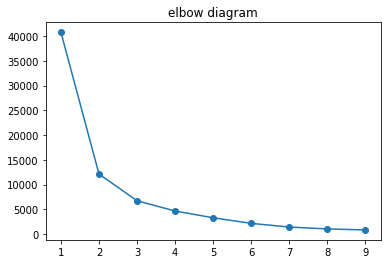

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
clust_range=range(1,10)
clust_error=[]
for i in clust_range:
    clusters=KMeans(i)
    clusters.fit(story2[["Lat","Long"]])
    clust_error.append(clusters.inertia_)
    
plt.figure(figsize=(6,4)) 
plt.plot(clust_range,clust_error,marker='o')
plt.title("elbow diagram")

In [ ]:
k=3
cluster=KMeans(k,random_state=42)
cluster.fit(story2[["Lat","Long"]])
story2["clusterid"]=cluster.labels_


In [ ]:
story2[story2["clusterid"]==0]

,index,Article ID,Page Name,Category,Article Tags,Time on Page,Pageviews,time_ratings,Ratings,score,soup,City,Lat,Long,country,iso2,State,clusterid
0,859,1245932,Star Bharat Show RadhaKrishn To Start Shooting...,television,Coronavirus Pandemic COVID-19 Lockdown Mall...,50:21:09,458,502109,5.0,4.101059,Star Bharat Show RadhaKrishn To Start Shootin...,Mumbai,18.987807,72.836447,India,IN,Maharashtra,0
1,1896,1512405,"Mumbai Rain Live Updates: Heavy Rain Continue,...",india,rain updates in mumbai today rains in mumbai ...,14:54:27,946,145427,3.0,2.885911,Mumbai Rain Live Updates: Heavy Rain Continue...,Mumbai,18.987807,72.836447,India,IN,Maharashtra,0
2,1983,1515189,Live Updates of Rain in Mumbai: Waterlogging &...,india,rain in mumbai mumbai rain today mumbai rain...,13:26:20,810,132620,3.0,2.871274,Live Updates of Rain in Mumbai: Waterlogging ...,Mumbai,18.987807,72.836447,India,IN,Maharashtra,0
3,1984,1519533,Bollywood actress Rhea Chakraborty under ED sc...,bollywood,Bollywood Rhea Chakarborty Sushant Singh Rajput,13:26:15,735,132615,3.0,2.861472,Bollywood actress Rhea Chakraborty under ED s...,Mumbai,18.987807,72.836447,India,IN,Maharashtra,0
4,1989,795998,"IMD issues red alert for Mumbai, overnight dow...",mumbai,Mumbai Rains Mumbai News Rain News Waterlog...,13:21:38,496,132138,3.0,2.817091,"IMD issues red alert for Mumbai, overnight do...",Mumbai,18.987807,72.836447,India,IN,Maharashtra,0
5,2000,1510524,Sushant Singh case: Bihar Police said - If rhe...,india,Bihar bihar police Gupteshwar Pandey Mumbai...,13:12:20,748,131220,3.0,2.863277,Sushant Singh case: Bihar Police said - If rh...,Mumbai,18.987807,72.836447,India,IN,Maharashtra,0
6,2122,540957,Bihar dgp gupteshwar pandey angry on sp vinay ...,bollywood,ankita Bihar Police Dil Bechara Kangana Mu...,11:28:26,932,112826,3.0,2.884560,Bihar dgp gupteshwar pandey angry on sp vinay...,Mumbai,18.987807,72.836447,India,IN,Maharashtra,0
7,2241,540058,sushant's sister rani emotional post on the ra...,bollywood,ankita Bihar Police Dil Bechara Kangana Mu...,10:02:44,628,100244,3.0,2.844590,sushant's sister rani emotional post on the r...,Mumbai,18.987807,72.836447,India,IN,Maharashtra,0
8,2302,540618,central government accepted bihar government c...,bollywood,ankita Bihar Police Dil Bechara Kangana Mu...,09:28:00,800,92800,3.0,2.870048,central government accepted bihar government ...,Mumbai,18.987807,72.836447,India,IN,Maharashtra,0
9,2347,795998,"IMD issues red alert for Mumbai, overnight dow...",mumbai,Mumbai Rains Mumbai News Rain News Waterlog...,08:52:41,379,85241,3.0,2.783068,"IMD issues red alert for Mumbai, overnight do...",Mumbai,18.987807,72.836447,India,IN,Maharashtra,0


In [ ]:
story2[story2["clusterid"]==1]

,index,Article ID,Page Name,Category,Article Tags,Time on Page,Pageviews,time_ratings,Ratings,score,soup,City,Lat,Long,country,iso2,State,clusterid
490,2099,1481793,vikas dubey married to richa 20 years ago,up-uk,Vikas Dubey Lucknow,11:46:35,815,114635,3.0,2.871878,vikas dubey married to richa 20 years ago up...,Lucknow,26.839281,80.923133,India,IN,Uttar Pradesh,1
491,2909,541568,police arrested two accused for falsely call t...,india,Atul Garg job Lucknow UP up police,04:52:10,436,45210,3.0,2.801093,police arrested two accused for falsely call ...,Lucknow,26.839281,80.923133,India,IN,Uttar Pradesh,1
492,2969,1481594,Schools to opened from 6th July in Uttar Pradesh,up-uk,dinesh sharma Lucknow,04:34:39,484,43439,3.0,2.814101,Schools to opened from 6th July in Uttar Prad...,Lucknow,26.839281,80.923133,India,IN,Uttar Pradesh,1
493,3078,1480469,Big relief for UP Government in 69 thousand te...,up-uk,69000 assistant teacher recruitment in UP UP ...,04:04:31,366,40431,3.0,2.778490,Big relief for UP Government in 69 thousand t...,Lucknow,26.839281,80.923133,India,IN,Uttar Pradesh,1
494,3154,1302918,Ram Mandir Bhoomi Pujan LIVE Updates: PM Modi ...,india,ayodhya ram mandir ayodhya ayodhya mandir r...,03:48:05,244,34805,3.0,2.723785,Ram Mandir Bhoomi Pujan LIVE Updates: PM Modi...,Lucknow,26.839281,80.923133,India,IN,Uttar Pradesh,1
495,3271,1461514,Know the real story of mafiya don brijesh singh,up-uk,brijesh singh dawood ibrahim UP Crime up ga...,03:23:13,171,32313,3.0,2.675891,Know the real story of mafiya don brijesh sin...,Lucknow,26.839281,80.923133,India,IN,Uttar Pradesh,1
496,4058,1518834,UP Police Encounter Hanuman Pandey aka Rakesh ...,up-uk,Hanuman Pandey Krishnanand Rai Rakesh Pandey...,01:42:03,99,14203,3.0,2.609026,UP Police Encounter Hanuman Pandey aka Rakesh...,Lucknow,26.839281,80.923133,India,IN,Uttar Pradesh,1
497,4968,1456422,up board result 2019 class 10th and 12th resul...,up-uk,UP Board Exam Result UP Board Exam Result 201...,00:50:32,32,5032,3.0,2.516135,up board result 2019 class 10th and 12th resu...,Lucknow,26.839281,80.923133,India,IN,Uttar Pradesh,1
498,5257,1446695,UP Board 12th Result 2020: Read Districtwise T...,states,up board UP Board 10th Result UP Board 12th ...,00:42:21,54,4221,3.0,2.551151,UP Board 12th Result 2020: Read Districtwise ...,Lucknow,26.839281,80.923133,India,IN,Uttar Pradesh,1
499,6304,1479423,When Big B became a tourist in Lucknow,up-uk,Amitabh Bachchan Bollywood entertainment,00:26:29,2,2629,3.0,2.458532,When Big B became a tourist in Lucknow up-uk ...,Lucknow,26.839281,80.923133,India,IN,Uttar Pradesh,1


In [ ]:
story2[story2["clusterid"]==2]

,index,Article ID,Page Name,Category,Article Tags,Time on Page,Pageviews,time_ratings,Ratings,score,soup,City,Lat,Long,country,iso2,State,clusterid
561,2194,1512475,Two-day curfew imposed in Srinagar on the firs...,india,article 370 Curfew srinagar,10:33:29,803,103329,3.0,2.870418,Two-day curfew imposed in Srinagar on the fir...,Srinagar,34.085652,74.805553,India,IN,Jammu and Kashmir,2
562,4009,562947,curfew removed from Srinagar on first annivers...,india,artical 370 curfew srinagar,01:46:42,88,14642,3.0,2.596302,curfew removed from Srinagar on first anniver...,Srinagar,34.085652,74.805553,India,IN,Jammu and Kashmir,2
563,4170,562947,curfew removed from Srinagar on first annivers...,india,artical 370 curfew srinagar,01:32:40,167,13240,3.0,2.672782,curfew removed from Srinagar on first anniver...,Srinagar,34.085652,74.805553,India,IN,Jammu and Kashmir,2
577,2283,1515202,CISF Sub Inspector dead body found in Mathura ...,up-uk,mathura mathura crime,09:35:44,890,93544,3.0,2.880307,CISF Sub Inspector dead body found in Mathura...,Mathura,27.503501,77.672145,India,IN,Uttar Pradesh,2
578,10275,1492557,case registered against bjp councilor and her ...,up-uk,mathura,00:05:51,7,551,2.0,2.441829,case registered against bjp councilor and her...,Mathura,27.503501,77.672145,India,IN,Uttar Pradesh,2
579,12214,1488344,Coronavirus Suspect girl death in Mathura utta...,up-uk,aapka pradesh Coronavirus mathura uttar pra...,00:03:05,3,305,1.0,2.436957,Coronavirus Suspect girl death in Mathura utt...,Mathura,27.503501,77.672145,India,IN,Uttar Pradesh,2
580,14992,1497781,Mathura court sentenced life imprisonment to a...,up-uk,mathura,00:01:27,1,127,1.0,2.448406,Mathura court sentenced life imprisonment to ...,Mathura,27.503501,77.672145,India,IN,Uttar Pradesh,2
581,2325,724316,Shaken Me To The Core: Arvind Kejriwal Condemn...,nation,Arbind Kejriwal Delhi AIMS Delhi rape rape,09:12:24,755,91224,3.0,2.864229,Shaken Me To The Core: Arvind Kejriwal Condem...,Delhi,28.651952,77.231495,India,IN,Delhi,2
582,2485,1513968,Delhi CM Arvind Kejriwal wishes ahead of Ram T...,india,arvind kejriwal ayodhya Narendra Modi Ram M...,07:33:43,667,73343,3.0,2.851200,Delhi CM Arvind Kejriwal wishes ahead of Ram ...,Delhi,28.651952,77.231495,India,IN,Delhi,2
583,2557,1305974,Coronavirus: India Sees Biggest Jump With Over...,india,Coronavirus Coronavirus Cases COVID-19 Delh...,06:58:09,554,65809,3.0,2.830286,Coronavirus: India Sees Biggest Jump With Ove...,Delhi,28.651952,77.231495,India,IN,Delhi,2


In [ ]:
def location_rec(df, longitude, latitude):
    predicted_cluster = cluster.predict(np.array([longitude,latitude]).reshape(1,-1))[0]
    v = pd.DataFrame(df[df['clusterid']==predicted_cluster]['Page Name'].head(5))   
    return v

location_rec(story2, 28.8046, 89.2029)


,Page Name
490,vikas dubey married to richa 20 years ago
491,police arrested two accused for falsely call t...
492,Schools to opened from 6th July in Uttar Pradesh
493,Big relief for UP Government in 69 thousand te...
494,Ram Mandir Bhoomi Pujan LIVE Updates: PM Modi ...


In [ ]:
location_rec(story2, 10.8505,76.27)

,Page Name
0,Star Bharat Show RadhaKrishn To Start Shooting...
1,"Mumbai Rain Live Updates: Heavy Rain Continue,..."
2,Live Updates of Rain in Mumbai: Waterlogging &...
3,Bollywood actress Rhea Chakraborty under ED sc...
4,"IMD issues red alert for Mumbai, overnight dow..."


In [ ]:
story

,index,Article ID,Page Name,Category,Article Tags,Time on Page,Pageviews,time_ratings,Ratings,score,soup
0,859,1245932,Star Bharat Show RadhaKrishn To Start Shooting...,television,Coronavirus Pandemic COVID-19 Lockdown Mall...,50:21:09,458,502109,5.0,4.101059,Star Bharat Show RadhaKrishn To Start Shootin...
1,1126,1513527,How Ram Mandir Movement Started; Know the Face...,india,Ashok Singhal Ayodhya Ram Mandir Bhumi Pujan ...,36:21:36,890,362136,5.0,4.441711,How Ram Mandir Movement Started; Know the Fac...
2,1290,1511660,21 years after High Court verdict Supreme Cour...,india,ayodhya babri masjid Ram mandir special seri...,29:27:24,762,292724,5.0,4.371097,21 years after High Court verdict Supreme Cou...
3,1503,562238,"Spurious liquor kills 90 in Punjab, 25 arreste...",punjab,Punjab News punjab police spurious Liquor,23:00:28,867,230028,4.0,3.654029,"Spurious liquor kills 90 in Punjab, 25 arrest..."
4,1546,794871,Shivsena leader minister subhash desai on Raj ...,maharashtra,cm uddhav thackeray interview Maha Vikas Agha...,21:49:21,922,214921,4.0,3.670265,Shivsena leader minister subhash desai on Raj...
5,1556,1517092,Rahul Gandhi Says RBI reveals the real Mood of...,india,PM Modi Rahul Gandhi RBI,21:26:13,956,212613,4.0,3.679561,Rahul Gandhi Says RBI reveals the real Mood o...
6,1562,1506724,Police will now question to former girlfriend ...,india,Ankita Lokhande bihar police india Rhea Cha...,21:16:44,805,211644,3.0,2.870664,Police will now question to former girlfriend...
7,1567,795121,coronavirus covid-19 lockdown unlock maharahst...,maharashtra,breaking news rain update ram mandir mumbai...,21:06:59,812,210659,3.0,2.871516,coronavirus covid-19 lockdown unlock maharahs...
8,1597,541138,Heavy Rainfall in Rajkot Jetpur at last day | ...,rajkot,Cyclone Havaman vibhag Heavy rain heavy rai...,20:19:12,843,201912,3.0,2.875160,Heavy Rainfall in Rajkot Jetpur at last day |...
9,1617,796099,UPSC Civil Services Examination 2019 result de...,maharashtra,Education News Education News Latest News ne...,19:56:32,823,195632,3.0,2.872833,UPSC Civil Services Examination 2019 result d...


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

#Define a TF-IDF Vectorizer Object. 
tfidf = TfidfVectorizer(stop_words='english')

#Replace NaN with an empty string
story['soup'] = story['soup'].fillna('')

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(story['soup'])

#Output the shape of tfidf_matrix
tfidf_matrix.shape

C:\Users\Anantha Krishnan\anaconda32\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


(12855, 22618)

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity


cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [ ]:
indices = pd.Series(story.index, index=story['Page Name']).drop_duplicates()
print(indices)

Page Name
Star Bharat Show RadhaKrishn To Start Shooting New Episodes From 1st June?                                                                                                                              0
How Ram Mandir Movement Started; Know the Faces of Ram Temple Movement; Advani, Kalyan Singh, Uma Bharti & More | Bhumi Pujan: राम मंदिर के लिए आंदोलन कैसे शुरू हुआ और मुख्य चेहरे कौन-कौन थे?         1
21 years after High Court verdict Supreme Court order place belongs to Ram Lala | मंदिर वहीं बनाएंगे: 21 साल बाद आया हाई कोर्ट का फैसला, सुप्रीम कोर्ट ने फैसला पलटा और राम लला की हो गई अयोध्या        2
Spurious liquor kills 90 in Punjab, 25 arrested, hotels seized | ਪੰਜਾਬ 'ਚ ਜ਼ਹਿਰੀਲੀ ਸ਼ਰਾਬ ਦਾ ਕਹਿਰ, ਮੌਤਾਂ ਦਾ ਅੰਕੜਾ 90, ਵੱਡੇ ਨੈੱਟਵਰਕ ਦਾ ਪਰਦਾਫਾਸ਼, 25 ਗ੍ਰਿਫਤਾਰ, ਕਈ ਢਾਬੇ ਸੀਲ                                   3
Shivsena leader minister subhash desai on Raj Thackeray Majha Maharashtra majha vision | मुख्यमंत्र्यांवरील राज ठाकरेंच्या त्या वक्तव्यावर शिवसेना म्हणते शुभ बोल नाऱ्या              

In [ ]:
def content_recs(ID,cosine_sim=cosine_sim):
    idx=indices[ID]
    sim_scores=list(enumerate(cosine_sim[idx]))
    sim_scores=sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sims_scores=sim_scores[1:11]
    story_indices=[i[0] for i in sim_scores]
    v=pd.DataFrame(story['Page Name'].iloc[story_indices].head(5))
    return v 

In [ ]:
content_recs('21 years after High Court verdict Supreme Court order place belongs to Ram Lala | मंदिर वहीं बनाएंगे: 21 साल बाद आया हाई कोर्ट का फैसला, सुप्रीम कोर्ट ने फैसला पलटा और राम लला की हो गई अयोध्या',cosine_sim)

,Page Name
2,21 years after High Court verdict Supreme Cour...
10326,Ayodhya Verdict Updates: Lal Krishna Advani on...
693,When the Britishers also believed that there w...
12828,ayodhya verdict live updates: ram mandir babri...
8486,Ayodhya Verdict The Babri Masjid was not built...


In [ ]:
content_recs('Star Bharat Show RadhaKrishn To Start Shooting New Episodes From 1st June?',cosine_sim)

,Page Name
0,Star Bharat Show RadhaKrishn To Start Shooting...
50,RadhaKrishn: Lead Actress Mallika Singh Aka 'R...
4151,RadhaKrishn: Lead Actress Mallika Singh Aka Ra...
2326,'RadhaKrishn' Actress Mallika Singh To EXIT He...
7164,RadhaKrishn Actress Mallika Singh To EXIT Her ...


In [ ]:
content_recs('Ahmedabad Business Man Deepak Mewada byus bentley flying spur car | અમદાવાદના કયા જાણીતા બિઝનેસમેને ખરીદી વર્લ્ડની સૌથી મોંઘી કાર? જાણો કારની કિંમત',cosine_sim)

,Page Name
12854,Ahmedabad Business Man Deepak Mewada byus bent...
12596,Ahmedabad car accident near Vaishnodevi circle...
12246,The husband asked for divorces about the relat...
12528,Ahmedabad honey trap case : girl and other fiv...
650,Girl police complaint against youth after frau...


In [ ]:
client.head()

,Client Id,City,Category,Article ID,Page Name,Time on Page,Article Word Count
0,1997812981,Pune,mumbai,792050,mumbaikar have antibody against coronavirus | ...,07:28:18,"52,900"
1,1981737908,Ahmedabad,business,534317,this raksha bandhan indian traders denies to b...,07:20:55,"17,679"
2,395838506.2,Surat,india,1142643,Rahul Gandhi Raps Centre As Inflation Reaches ...,07:07:11,"43,290"
3,316197645.2,Hubli,maharashtra,795604,ABP Majha top 10 news coronavirus update lates...,06:57:12,"11,760"
4,1715218934,Pune,maharashtra,795711,IMD predicts heavy rain in Mumbai and Maharash...,06:53:39,"20,868"


In [ ]:
client['Article ID'].astype(str)
story['Article ID'].astype(str)
client2=pd.merge(client,story,on='Page Name',how='outer')

In [ ]:
client

,Client Id,City,Category,Article ID,Page Name,Time on Page,Article Word Count
0,1997812981,Pune,mumbai,792050,mumbaikar have antibody against coronavirus | ...,07:28:18,"52,900"
1,1981737908,Ahmedabad,business,534317,this raksha bandhan indian traders denies to b...,07:20:55,"17,679"
2,395838506.2,Surat,india,1142643,Rahul Gandhi Raps Centre As Inflation Reaches ...,07:07:11,"43,290"
3,316197645.2,Hubli,maharashtra,795604,ABP Majha top 10 news coronavirus update lates...,06:57:12,"11,760"
4,1715218934,Pune,maharashtra,795711,IMD predicts heavy rain in Mumbai and Maharash...,06:53:39,"20,868"
5,1328088932,Lucknow,india,1334054,Know What is the truth of death claim due to ...,06:14:26,"43,617"
6,amp-VR1y1nPYssqTliAOG4YqiA,Ludhiana,up-uk,1494566,Supreme court hearing on Vikas Dubey Encounter...,05:19:52,"57,706"
7,1105332221,Pune,maharashtra,767557,"ABP Majha smart bulletin for 5th May 2020, lat...",05:14:43,"11,895"
8,316197645.2,Bengaluru,maharashtra,795604,ABP Majha top 10 news coronavirus update lates...,05:08:55,"15,330"
9,1106952660,Pune,india,796518,Coronavirus pm modi reaches ayodhya quick pray...,04:43:05,"8,206"


In [ ]:
import datetime
from datetime import time



In [ ]:
client["Time on Page"]=pd.to_datetime(client["Time on Page"])
client

,Client Id,City,Category,Article ID,Page Name,Time on Page,Article Word Count
0,1997812981,Pune,mumbai,792050,mumbaikar have antibody against coronavirus | ...,2020-08-13 07:28:18,"52,900"
1,1981737908,Ahmedabad,business,534317,this raksha bandhan indian traders denies to b...,2020-08-13 07:20:55,"17,679"
2,395838506.2,Surat,india,1142643,Rahul Gandhi Raps Centre As Inflation Reaches ...,2020-08-13 07:07:11,"43,290"
3,316197645.2,Hubli,maharashtra,795604,ABP Majha top 10 news coronavirus update lates...,2020-08-13 06:57:12,"11,760"
4,1715218934,Pune,maharashtra,795711,IMD predicts heavy rain in Mumbai and Maharash...,2020-08-13 06:53:39,"20,868"
5,1328088932,Lucknow,india,1334054,Know What is the truth of death claim due to ...,2020-08-13 06:14:26,"43,617"
6,amp-VR1y1nPYssqTliAOG4YqiA,Ludhiana,up-uk,1494566,Supreme court hearing on Vikas Dubey Encounter...,2020-08-13 05:19:52,"57,706"
7,1105332221,Pune,maharashtra,767557,"ABP Majha smart bulletin for 5th May 2020, lat...",2020-08-13 05:14:43,"11,895"
8,316197645.2,Bengaluru,maharashtra,795604,ABP Majha top 10 news coronavirus update lates...,2020-08-13 05:08:55,"15,330"
9,1106952660,Pune,india,796518,Coronavirus pm modi reaches ayodhya quick pray...,2020-08-13 04:43:05,"8,206"


In [ ]:
client["Time on Page"].dt.minute

0         28
1         20
2          7
3         57
4         53
          ..
104994     2
104995     2
104996     2
104997     2
104998     2
Name: Time on Page, Length: 104208, dtype: int64

In [ ]:
client["Time on Page"].dt.second

0         18
1         55
2         11
3         12
4         39
          ..
104994     9
104995     9
104996     9
104997     9
104998     9
Name: Time on Page, Length: 104208, dtype: int64

In [ ]:
client["Time"]=client["Time on Page"].dt.hour*3600 + client["Time on Page"].dt.minute*60 + client["Time on Page"].dt.second
client =client[client['Time'].apply(lambda x: str(x).isdigit())]
client['Time']=pd.to_numeric(client['Time'], downcast='integer', errors='coerce')
client

,Client Id,City,Category,Article ID,Page Name,Time on Page,Article Word Count,Time
0,1997812981,Pune,mumbai,792050,mumbaikar have antibody against coronavirus | ...,2020-08-13 07:28:18,"52,900",26898
1,1981737908,Ahmedabad,business,534317,this raksha bandhan indian traders denies to b...,2020-08-13 07:20:55,"17,679",26455
2,395838506.2,Surat,india,1142643,Rahul Gandhi Raps Centre As Inflation Reaches ...,2020-08-13 07:07:11,"43,290",25631
3,316197645.2,Hubli,maharashtra,795604,ABP Majha top 10 news coronavirus update lates...,2020-08-13 06:57:12,"11,760",25032
4,1715218934,Pune,maharashtra,795711,IMD predicts heavy rain in Mumbai and Maharash...,2020-08-13 06:53:39,"20,868",24819
5,1328088932,Lucknow,india,1334054,Know What is the truth of death claim due to ...,2020-08-13 06:14:26,"43,617",22466
6,amp-VR1y1nPYssqTliAOG4YqiA,Ludhiana,up-uk,1494566,Supreme court hearing on Vikas Dubey Encounter...,2020-08-13 05:19:52,"57,706",19192
7,1105332221,Pune,maharashtra,767557,"ABP Majha smart bulletin for 5th May 2020, lat...",2020-08-13 05:14:43,"11,895",18883
8,316197645.2,Bengaluru,maharashtra,795604,ABP Majha top 10 news coronavirus update lates...,2020-08-13 05:08:55,"15,330",18535
9,1106952660,Pune,india,796518,Coronavirus pm modi reaches ayodhya quick pray...,2020-08-13 04:43:05,"8,206",16985


In [ ]:
client['Article Word Count']=client['Article Word Count'].str.replace(",","")


In [ ]:
client['Article Word Count']=client['Article Word Count'].astype(int)
client["Words per Sec"]=client["Article Word Count"]/client["Time"]

In [ ]:
client

,Client Id,City,Category,Article ID,Page Name,Time on Page,Article Word Count,Time,Words per Sec
0,1997812981,Pune,mumbai,792050,mumbaikar have antibody against coronavirus | ...,2020-08-13 07:28:18,52900,26898,1.966689
1,1981737908,Ahmedabad,business,534317,this raksha bandhan indian traders denies to b...,2020-08-13 07:20:55,17679,26455,0.668267
2,395838506.2,Surat,india,1142643,Rahul Gandhi Raps Centre As Inflation Reaches ...,2020-08-13 07:07:11,43290,25631,1.688970
3,316197645.2,Hubli,maharashtra,795604,ABP Majha top 10 news coronavirus update lates...,2020-08-13 06:57:12,11760,25032,0.469799
4,1715218934,Pune,maharashtra,795711,IMD predicts heavy rain in Mumbai and Maharash...,2020-08-13 06:53:39,20868,24819,0.840807
5,1328088932,Lucknow,india,1334054,Know What is the truth of death claim due to ...,2020-08-13 06:14:26,43617,22466,1.941467
6,amp-VR1y1nPYssqTliAOG4YqiA,Ludhiana,up-uk,1494566,Supreme court hearing on Vikas Dubey Encounter...,2020-08-13 05:19:52,57706,19192,3.006774
7,1105332221,Pune,maharashtra,767557,"ABP Majha smart bulletin for 5th May 2020, lat...",2020-08-13 05:14:43,11895,18883,0.629932
8,316197645.2,Bengaluru,maharashtra,795604,ABP Majha top 10 news coronavirus update lates...,2020-08-13 05:08:55,15330,18535,0.827084
9,1106952660,Pune,india,796518,Coronavirus pm modi reaches ayodhya quick pray...,2020-08-13 04:43:05,8206,16985,0.483132


In [ ]:
client["Words per Sec"]=client["Words per Sec"].round()

In [ ]:
for i in client.columns:
    for row in client.index:
        if client.loc[row,"Words per Sec"]==0 or client.loc[row,"Words per Sec"]>8:
            client.loc[row,"Ratings"]=0
        if client.loc[row,"Words per Sec"]==1 or client.loc[row,"Words per Sec"]==2:
            client.loc[row,"Ratings"]=1
        if client.loc[row,"Words per Sec"]==2 or client.loc[row,"Words per Sec"]==3 or client.loc[row,"Words per Sec"]==7:
            client.loc[row,"Ratings"]=3    
        if client.loc[row,"Words per Sec"]==4 or client.loc[row,"Words per Sec"]==5: 
            client.loc[row,"Ratings"]=4  
        if client.loc[row,"Words per Sec"]==6:
            client.loc[row,"Ratings"]=5  
        if client.loc[row,"Words per Sec"]==8:
            client.loc[row,"Ratings"]=2  

In [ ]:
client

,Client Id,City,Category,Article ID,Page Name,Time on Page,Article Word Count,Time,Words per Sec,Ratings
0,1997812981,Pune,mumbai,792050,mumbaikar have antibody against coronavirus | ...,2020-08-13 07:28:18,52900,26898,2.0,3.0
1,1981737908,Ahmedabad,business,534317,this raksha bandhan indian traders denies to b...,2020-08-13 07:20:55,17679,26455,1.0,1.0
2,395838506.2,Surat,india,1142643,Rahul Gandhi Raps Centre As Inflation Reaches ...,2020-08-13 07:07:11,43290,25631,2.0,3.0
3,316197645.2,Hubli,maharashtra,795604,ABP Majha top 10 news coronavirus update lates...,2020-08-13 06:57:12,11760,25032,0.0,0.0
4,1715218934,Pune,maharashtra,795711,IMD predicts heavy rain in Mumbai and Maharash...,2020-08-13 06:53:39,20868,24819,1.0,1.0
5,1328088932,Lucknow,india,1334054,Know What is the truth of death claim due to ...,2020-08-13 06:14:26,43617,22466,2.0,3.0
6,amp-VR1y1nPYssqTliAOG4YqiA,Ludhiana,up-uk,1494566,Supreme court hearing on Vikas Dubey Encounter...,2020-08-13 05:19:52,57706,19192,3.0,3.0
7,1105332221,Pune,maharashtra,767557,"ABP Majha smart bulletin for 5th May 2020, lat...",2020-08-13 05:14:43,11895,18883,1.0,1.0
8,316197645.2,Bengaluru,maharashtra,795604,ABP Majha top 10 news coronavirus update lates...,2020-08-13 05:08:55,15330,18535,1.0,1.0
9,1106952660,Pune,india,796518,Coronavirus pm modi reaches ayodhya quick pray...,2020-08-13 04:43:05,8206,16985,0.0,0.0


In [ ]:
client1=client.head(70000)

In [ ]:
feature_matrix=client1.pivot_table(index='Page Name',columns='Client Id',values='Ratings').fillna(0)
                                   
                                   


In [ ]:
feature_matrix

Client Id,-AVltmCpswoOkiFzjgVm2uTDnrg5wur7qd3Ngj2oonkQ36-c-G_PeTM0wXt3dgyh,-AVnpwvJUl5ImXZQOFyRc10s1FsTKqSrWuqTiAifMuOMn97CpCTTmV2a5WmZWdz7,-FBXQ8a6M-jGuW4pbDfsfmHVKNq0jydb76qjPU3tVH7SD1Fe1eyI0qLmCZg0Sd1_,-G5ko5kamDnokLYnuIEzsvyEywRhE3MEJtFstryASsBTmlo9r8NdLOIqz6x_qWqE,-GL_Xkwm7FjDeKo75-mEH32eiRlgYWss0EYw9VgUZGs0q9Du6B-Yu_4q1G9hKv-J,-JerDvVO2dtl9XkHJ7B12ufgqXO2o9tiZYm30roBXQnoyxcQ-TNpb2IN5mKWVzjn,-P1zRvuAygh6kLjfNDT5CgLEr68LjdXRoP9l8kQPilylOS_TLgeS4vsbWrTHlWyU,-P689VsQU8K3LjPRlKgdLI-yg-mzYAkmDsQIlY3w06RETNagyTa762ae3n2ryVsQ,-R2l5eNgEbkfpyFA9q0nY3Op1RV0exGKdxdsBxhV5E9iTsgnZ0WC-7c13qeasvDj,-T16AJO4d0jpJ_Hhj-VP8YUSU39jyhMWC0eEYk0WFxe9Ed7VienrksjLXO4QouV6,...,zOHaMMn6VOCp5dh_VPOlYTnS2OJscVtocuhYRUxm5FMt2BxlA_eiFFZt0NN1lMus,zRlsecxVNUWuD-JM9Q4-zxwH7RHBP1qVk_Aq4wdv6ULNUsFfDoBVkCPf-YMgW86B,zVLUFCdH3yXq7BZbDgO2tUpXWWIrSYFXtoudCpbPMcOGXu4ZwnjNchuUEqS10CiH,zZC5AhBSR0slFVjyAaQ7EeMaPddnuaXdWvjwg-g_F1QAw11SxB7sR-Rr5kgPmTvy,zat1nLjuq0RCz3vP_RLXds39h8MToMB5xmDIRNozQKLgiPe47XHdZXeuzWJRc5n6,zegaFEsdZViY5KAMWA7WZxMMj0oL5sO8MxqnsQF9g3M5czIh1WuBzRIyglspmYjG,zpMkOkF1mc8VnL4_yEmBFwsFU7HKrC4JC1D1HJ4IORNB1w5FHMDkfkicZ63AsW75,ztb3bnLO70ExRNOR-_liZLKchw03nnzf8nlGLvMbOBfVVSOQDux4lL1lQNNGqONJ,zw5EJWwOvi7_Q9jB4ZNPjDPrD0pljWLMqurcUQWWfoRCU9mPkXLu1D1mitnYgfti,zzdU41B9GE_8p7pJCcldmvIV5ZkrMZLNB9igzoJ8H2a1TmKFarG7SrbpBdWNc0hr
Page Name,,,,,,,,,,,,,,,,,,,,,
1987 batch IPS officer Gupteshwar Pandey becomes Bihars new DGP,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"2 lakh 2 thousand rupees were withdrawn from the bank account of Sushant Singh in the name of worship, in the bank details revealed | पूजा-पाठ के नाम पर सुशांत सिंह के बैंक अकाउंट से एक महीने में निकाले गए थे 2 लाख 2 हजार रुपए, बैंक डीटेल्स में हुआ खुलासा",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Amit Sadh has revealed about the upcoming web series, know | आने वाली वेब सीरीज के बारे में अमित साध ने किया है खुलासा, जानें",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Amitabh Bachchan attended Rishi Kapoors wedding procession despite injuries on his arm,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ayodhya results not based on facts but on emotions says Prakash Ambedkar | अयोध्या निकाल तथ्य-पुरावे नव्हे तर भावनेवर आधारलेला : प्रकाश आंबेडकर,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Ayushmann Khurrana wife Tahira Kashyap talks about life in Chandigarh and why she left Mumbai | ताहिरा कश्यप ने शेयर किया चंडीगढ़ में रहने का अनुभव, बताई आयुष्मान के साथ मुंबई से शिफ्ट होने की वजह",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Bandish Bendits Review: This web series is completely different from Bollywood musicals drama | Bandish Bendits Review: बॉलीवुड के म्यूजिकल तमाशों से बिल्कुल अलग है यह वेब सीरीज,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Best rakhi gift ideas to make your sister feel special on this Raksha Bandhan 2020 | Raksha Bandhan 2020: ये खास गैजेट्स आपकी प्यारी बहन के लिए बन सकते हैं बेस्ट गिफ्ट,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Bigg Boss 13 contestants show love, Shefali Jariwala tied Hindustani Bhau | बिग बॉस 13 के कंटेस्टेंट्स का दिखा प्यार, शेफाली जरीवाला ने बांधी हिंदुस्तानी भाऊ को राखी",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
feat2= client.pivot_table(index='Page Name',columns='Client Id',values='Ratings').fillna(0)

In [ ]:
feat2

In [ ]:
def standardize(row):
    new_row= (row-row.mean())/(row.max()-row.mean())
    return new_row

feat_std=feature_matrix.apply(standardize)


In [ ]:
feat_std=feat_std.fillna(0)

In [ ]:
feat2.fillna(0)

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity


item_simiarity= cosine_similarity(feat_std)


In [ ]:
item_similarity_df=pd.DataFrame(item_simiarity,index=feat_std.index,columns=feat_std.index)

In [ ]:
item_similarity_df

Page Name,1987 batch IPS officer Gupteshwar Pandey becomes Bihars new DGP,"2 lakh 2 thousand rupees were withdrawn from the bank account of Sushant Singh in the name of worship, in the bank details revealed | पूजा-पाठ के नाम पर सुशांत सिंह के बैंक अकाउंट से एक महीने में निकाले गए थे 2 लाख 2 हजार रुपए, बैंक डीटेल्स में हुआ खुलासा","Amit Sadh has revealed about the upcoming web series, know | आने वाली वेब सीरीज के बारे में अमित साध ने किया है खुलासा, जानें",Amitabh Bachchan attended Rishi Kapoors wedding procession despite injuries on his arm,Ayodhya results not based on facts but on emotions says Prakash Ambedkar | अयोध्या निकाल तथ्य-पुरावे नव्हे तर भावनेवर आधारलेला : प्रकाश आंबेडकर,"Ayushmann Khurrana wife Tahira Kashyap talks about life in Chandigarh and why she left Mumbai | ताहिरा कश्यप ने शेयर किया चंडीगढ़ में रहने का अनुभव, बताई आयुष्मान के साथ मुंबई से शिफ्ट होने की वजह",Bandish Bendits Review: This web series is completely different from Bollywood musicals drama | Bandish Bendits Review: बॉलीवुड के म्यूजिकल तमाशों से बिल्कुल अलग है यह वेब सीरीज,Best rakhi gift ideas to make your sister feel special on this Raksha Bandhan 2020 | Raksha Bandhan 2020: ये खास गैजेट्स आपकी प्यारी बहन के लिए बन सकते हैं बेस्ट गिफ्ट,"Bigg Boss 13 contestants show love, Shefali Jariwala tied Hindustani Bhau | बिग बॉस 13 के कंटेस्टेंट्स का दिखा प्यार, शेफाली जरीवाला ने बांधी हिंदुस्तानी भाऊ को राखी",Bollywood actress Anushka Sharma and cricketer Virat Kohli helped flood victims of Assam and Bihar | बॉलीवुड अभिनेत्री अनुष्का शर्मा और क्रिकेटर विराट कोहली ने की असम और बिहार के बाढ़ पीड़ितों की मदद,...,ਡਾ. ਮਨਮੋਹਨ ਸਿੰਘ ਬਾਰੇ ਕਿਤਾਬ ਚ 80 ਫੀਸਦੀ ਝੂਠ !,ਪੂਰੇ ਕਰਜ਼ੇ ਤੇ ਲਕੀਰ ਫੇਰਨ ਤੇ ਅੜੇ ਪੰਜਾਬ ਦੇ ਕਿਸਾਨ,‘Be Still And Do Not Move’: The Covid-19 Migrant And The Ministry Of The Soul,"‘Covid-19 Patients Not Infectious After 9 Days,’ UK Studies Make New & Striking Claim",‘Is This Even For Real?’ Sushant Singh Rajput’s Sister Shweta Singh Shocked After Patna SP Vinay Tiwari Forcibly Quarantined By BMC,‘Justice For SSR’: Hrithik Roshan’s Mother & Sister Welcome CBI Probe Into Sushant Singh Rajput’s Case,"‘Kundali Bhagya’ actress Usha Bachani, fourth wife of Mahesh Anand, REACTS to her former husband’s death",‘Saath Nibhana Saathiya’ Actress Rucha’s Father Beats Coronavirus But Battles For Lung Recovery,‘The Kapil Sharma Show’ Will Be Back To Make Everyone Laugh From This Date,‘Yeh Rishtey Hain Pyaar Ke’: Yeh Teri Galiyan Actor Avinash Mishra To REPLACE Ritvik Arora In Shaheer Sheikhs Show
Page Name,,,,,,,,,,,,,,,,,,,,,
1987 batch IPS officer Gupteshwar Pandey becomes Bihars new DGP,1.000000,0.050622,0.032876,0.050622,-0.048681,1.000000,0.050622,0.050622,0.157027,1.000000,...,0.042282,0.050622,1.000000,0.032876,-0.010018,0.008000,0.050622,0.024443,0.050622,0.046454
"2 lakh 2 thousand rupees were withdrawn from the bank account of Sushant Singh in the name of worship, in the bank details revealed | पूजा-पाठ के नाम पर सुशांत सिंह के बैंक अकाउंट से एक महीने में निकाले गए थे 2 लाख 2 हजार रुपए, बैंक डीटेल्स में हुआ खुलासा",0.050622,1.000000,0.001640,0.002545,-0.002688,0.050622,0.002545,0.002545,0.007926,0.050622,...,0.002088,0.002545,0.050622,0.001640,-0.000606,0.000353,0.002545,0.001207,0.002545,0.002317
"Amit Sadh has revealed about the upcoming web series, know | आने वाली वेब सीरीज के बारे में अमित साध ने किया है खुलासा, जानें",0.032876,0.001640,1.000000,0.001640,-0.001916,0.032876,0.001640,0.001640,0.005130,0.032876,...,0.001316,0.001640,0.032876,0.001046,-0.000469,0.000190,0.001640,0.000761,0.001640,0.001478
Amitabh Bachchan attended Rishi Kapoors wedding procession despite injuries on his arm,0.050622,0.002545,0.001640,1.000000,-0.002688,0.050622,0.002545,0.002545,0.007926,0.050622,...,0.002088,0.002545,0.050622,0.001640,-0.000606,0.000353,0.002545,0.001207,0.002545,0.002317
Ayodhya results not based on facts but on emotions says Prakash Ambedkar | अयोध्या निकाल तथ्य-पुरावे नव्हे तर भावनेवर आधारलेला : प्रकाश आंबेडकर,-0.048681,-0.002688,-0.001916,-0.002688,1.000000,-0.

In [ ]:
user_similarity_df=pd.DataFrame(item_simiarity,index=feat_std.columns,columns=feat_std.columns)

In [ ]:
def collab_rec(title):
    sim_score=item_similarity_df[title]
    sim_score=sim_score.sort_values(ascending=False)
    v=pd.DataFrame(sim_score.head(5))
    v.reset_index(drop=False,inplace=True)
    v=pd.DataFrame(v["Page Name"])
    return v

In [ ]:
collab_rec('How Ram Mandir Movement Started; Know the Faces of Ram Temple Movement; Advani, Kalyan Singh, Uma Bharti & More | Bhumi Pujan: राम मंदिर के लिए आंदोलन कैसे शुरू हुआ और मुख्य चेहरे कौन-कौन थे?')


,Page Name
0,How Ram Mandir Movement Started; Know the Face...
1,13 New Positive cases of Corona in Surendranag...
2,Heavy rainfall will be start in Gujarat on nex...
3,There are many forms of life of Lord Rama whic...
4,Bollywood prays for Beirut Explosion Priyanka ...


In [ ]:
collab_rec('Mahabharat Srimad Bhagwat Geeta yada yada hi dharmasya I take an avatar I appear When there is loss of religion | यदा यदा हि धर्मस्य ग्लानिर्भवति भारत गीता का यह श्लोक निराशा को दूर करता है, जानें अर्थ ')


,Page Name
0,1987 batch IPS officer Gupteshwar Pandey beco...
1,The Supreme Court hearing on the final year ex...
2,Team Kangana Ranaut REACTS To Sushant Singh Ra...
3,Telangana crosses 66000 mark in coronavirus ca...
4,Maharashtra State Board of Secondary & Higher ...


In [ ]:
collab_rec('Exclusive: Know the detail of Sushant Ex Manager disha salian Suicide and Last Night- ann | Exclusive: उस रात का सच क्या है? जब सुशांत की एक्स मैनेजर दिशा ने कर ली थी आत्महत्या, जानिए सब कुछ')


,Page Name
0,Exclusive: Know the detail of Sushant Ex Manag...
1,UP Deputy CM Keshav prasad Maurya attack Nepal...
2,Amruta Fadnavis for criticising the Mumbai Pol...
3,Pakistan High Court said- India gets opportuni...
4,Mumbai Police on Sushant Singh Rajput father s...


In [ ]:
def hybrid_rec(title,latitude,longitude):
    v=pop_rec()
    v=v.append(location_rec(story2,latitude,longitude),ignore_index=True)
    v=v.append(content_recs(title,cosine_sim),ignore_index=True)
    v=v.append(collab_rec(title),ignore_index=True)
    return v

In [ ]:
hybrid_rec('How Ram Mandir Movement Started; Know the Faces of Ram Temple Movement; Advani, Kalyan Singh, Uma Bharti & More | Bhumi Pujan: राम मंदिर के लिए आंदोलन कैसे शुरू हुआ और मुख्य चेहरे कौन-कौन थे?',19.0760, 72.8777)

,Page Name
0,How Ram Mandir Movement Started; Know the Face...
1,21 years after High Court verdict Supreme Cour...
2,Star Bharat Show RadhaKrishn To Start Shooting...
3,Rahul Gandhi Says RBI reveals the real Mood of...
4,Shivsena leader minister subhash desai on Raj ...
5,Star Bharat Show RadhaKrishn To Start Shooting...
6,"Mumbai Rain Live Updates: Heavy Rain Continue,..."
7,Live Updates of Rain in Mumbai: Waterlogging &...
8,Bollywood actress Rhea Chakraborty under ED sc...
9,"IMD issues red alert for Mumbai, overnight dow..."


In [ ]:
hybrid_rec('Mahabharat Srimad Bhagwat Geeta yada yada hi dharmasya I take an avatar I appear When there is loss of religion | यदा यदा हि धर्मस्य ग्लानिर्भवति भारत गीता का यह श्लोक निराशा को दूर करता है, जानें अर्थ ',19.0760, 72.8777)

,Page Name
0,How Ram Mandir Movement Started; Know the Face...
1,21 years after High Court verdict Supreme Cour...
2,Star Bharat Show RadhaKrishn To Start Shooting...
3,Rahul Gandhi Says RBI reveals the real Mood of...
4,Shivsena leader minister subhash desai on Raj ...
5,Star Bharat Show RadhaKrishn To Start Shooting...
6,"Mumbai Rain Live Updates: Heavy Rain Continue,..."
7,Live Updates of Rain in Mumbai: Waterlogging &...
8,Bollywood actress Rhea Chakraborty under ED sc...
9,"IMD issues red alert for Mumbai, overnight dow..."


In [ ]:
hybrid_rec('21 years after High Court verdict Supreme Court order place belongs to Ram Lala | मंदिर वहीं बनाएंगे: 21 साल बाद आया हाई कोर्ट का फैसला, सुप्रीम कोर्ट ने फैसला पलटा और राम लला की हो गई अयोध्या',28.7041, 77.1025)


,Page Name
0,How Ram Mandir Movement Started; Know the Face...
1,21 years after High Court verdict Supreme Cour...
2,Star Bharat Show RadhaKrishn To Start Shooting...
3,Rahul Gandhi Says RBI reveals the real Mood of...
4,Shivsena leader minister subhash desai on Raj ...
5,Two-day curfew imposed in Srinagar on the firs...
6,curfew removed from Srinagar on first annivers...
7,curfew removed from Srinagar on first annivers...
8,CISF Sub Inspector dead body found in Mathura ...
9,case registered against bjp councilor and her ...
